# Time Series - Chicago Crime Data

#### Import required libraries and daily crime data prepped in R

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_dly_crm = pd.read_csv('chicago_daily_crime.csv')
#df_dly_crm = pd.read_csv('../input/chicago-daily-crime/chicago_daily_crime.csv')
df_dly_crm.columns = ['Ct', 'Date']
df_dly_crm.head()

,Ct,Date
0,1821,2001-01-01 23:59:54
1,1143,2001-01-02 23:55:00
2,1151,2001-01-03 23:59:00
3,1166,2001-01-04 23:55:01
4,1267,2001-01-05 23:59:00


#### Daily Crime - Entire Span - Initial Time Series Plot

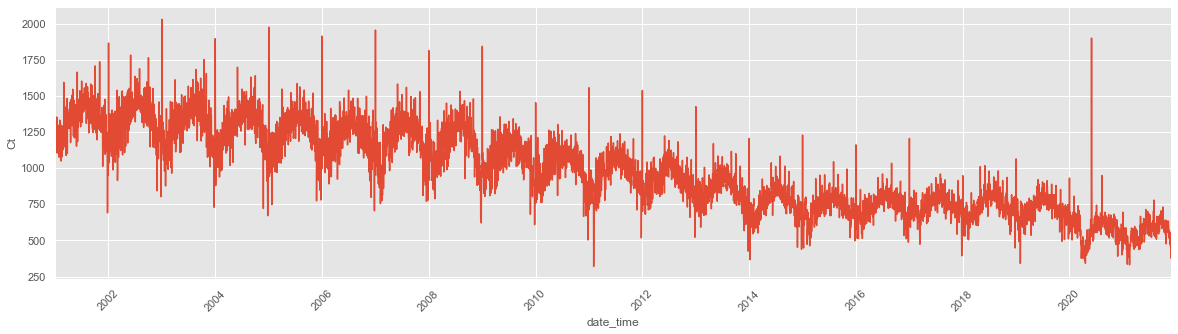

In [19]:
#https://stackoverflow.com/questions/22543208/ggplot-styles-in-python
from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
sns.lineplot(x = "date_time", y = "Ct", data = df_dly_crm).margins(x=0)
plt.xticks(rotation=45)
plt.show()

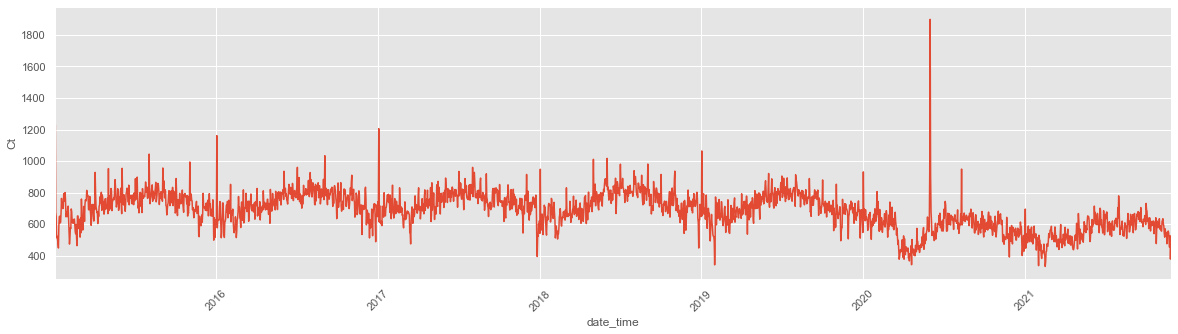

In [29]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
sns.lineplot(x = "date_time", y = "Ct", data = df_dly_crm[df_dly_crm['date_time']>'2015']).margins(x=0)
plt.xticks(rotation=45)
plt.show()

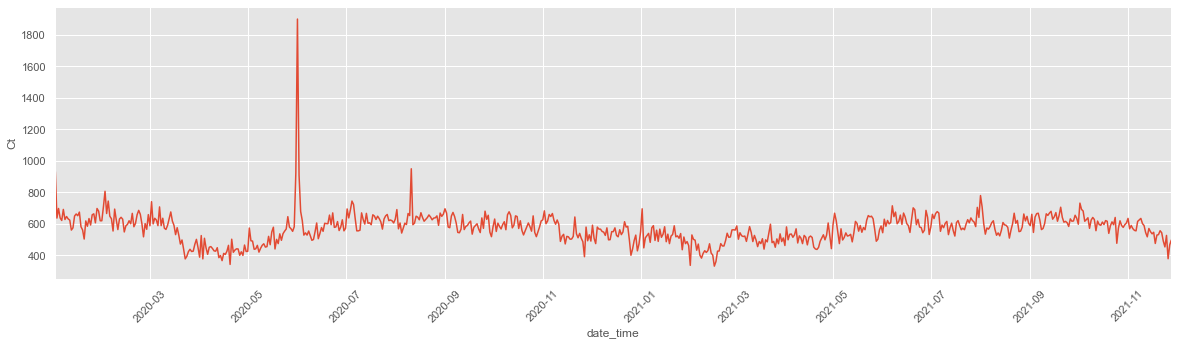

In [27]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
sns.lineplot(x = "date_time", y = "Ct", data = df_dly_crm[df_dly_crm['date_time']>'2020']).margins(x=0)
plt.xticks(rotation=45)
plt.show()

### Feature Engineering for Classical ML Regression  
    - Feature Engineering necessary for Random Forests, etc
    - Turn Time Series Forecasting into Tabular Regression Problem
    - No Data Prep will be necessary for LSTMs

#### Add Columns for Daily count at lag 1, lag 2, etc.

In [4]:
#df_dly_crm['Lag_1_Day']=df_dly_crm['Ct'].shift(1)
for i in range(1,17):
    #print(i)
    df_dly_crm['Lag_'+str(i)+'_Day']=df_dly_crm['Ct'].shift(i)

df_dly_crm=df_dly_crm.dropna()
df_dly_crm.head()

,Ct,Date,Lag_1_Day,Lag_2_Day,Lag_3_Day,Lag_4_Day,Lag_5_Day,Lag_6_Day,Lag_7_Day,Lag_8_Day,Lag_9_Day,Lag_10_Day,Lag_11_Day,Lag_12_Day,Lag_13_Day,Lag_14_Day,Lag_15_Day,Lag_16_Day
16,1288,2001-01-17 23:59:18,1251.0,1312.0,1119.0,1311.0,1353.0,1228.0,1237.0,1184.0,1157.0,1105.0,1290.0,1267.0,1166.0,1151.0,1143.0,1821.0
17,1278,2001-01-18 23:59:21,1288.0,1251.0,1312.0,1119.0,1311.0,1353.0,1228.0,1237.0,1184.0,1157.0,1105.0,1290.0,1267.0,1166.0,1151.0,1143.0
18,1214,2001-01-19 23:55:00,1278.0,1288.0,1251.0,1312.0,1119.0,1311.0,1353.0,1228.0,1237.0,1184.0,1157.0,1105.0,1290.0,1267.0,1166.0,1151.0
19,1256,2001-01-20 23:58:56,1214.0,1278.0,1288.0,1251.0,1312.0,1119.0,1311.0,1353.0,1228.0,1237.0,1184.0,1157.0,1105.0,1290.0,1267.0,1166.0
20,1105,2001-01-21 23:58:55,1256.0,1214.0,1278.0,1288.0,1251.0,1312.0,1119.0,1311.0,1353.0,1228.0,1237.0,1184.0,1157.0,1105.0,1290.0,1267.0


In [5]:
df_dly_crm.columns

Index(['Ct', 'Date', 'Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day',
       'Lag_5_Day', 'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day',
       'Lag_10_Day', 'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day',
       'Lag_15_Day', 'Lag_16_Day'],
      dtype='object')

In [6]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [7]:
s.iloc[-1]

9

In [8]:
s_2=s.rolling(window=2).mean()
s_2

0    NaN
1    0.5
2    1.5
3    2.5
4    3.5
5    4.5
6    5.5
7    6.5
8    7.5
9    8.5
dtype: float64

#### Add Moving Average Features

Need to specify rolling mean based on a time offset. Because any Predictors at time t+1 should not require use of y value at time t+1.

https://stackoverflow.com/questions/53084967/pandas-rolling-method-with-data-to-be-offset

https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-overview

In [9]:
for c in range(1,17):
    df_dly_crm['Mov_Avg'+str(c)]=df_dly_crm.Ct.shift(1).rolling(window=c).mean()
df_dly_crm=df_dly_crm.dropna()
df_dly_crm.head()

,Ct,Date,Lag_1_Day,Lag_2_Day,Lag_3_Day,Lag_4_Day,Lag_5_Day,Lag_6_Day,Lag_7_Day,Lag_8_Day,...,Mov_Avg7,Mov_Avg8,Mov_Avg9,Mov_Avg10,Mov_Avg11,Mov_Avg12,Mov_Avg13,Mov_Avg14,Mov_Avg15,Mov_Avg16
32,1236,2001-02-02 23:55:00,1332.0,1189.0,1211.0,1172.0,1076.0,1215.0,1296.0,1183.0,...,1213.000000,1209.250,1197.222222,1202.5,1200.454545,1192.500000,1197.384615,1198.571429,1203.866667,1209.1250
33,1184,2001-02-03 23:58:00,1236.0,1332.0,1189.0,1211.0,1172.0,1076.0,1215.0,1296.0,...,1204.428571,1215.875,1212.222222,1201.1,1205.545455,1203.416667,1195.846154,1200.142857,1201.066667,1205.8750
34,1149,2001-02-04 23:59:00,1184.0,1236.0,1332.0,1189.0,1211.0,1172.0,1076.0,1215.0,...,1200.000000,1201.875,1212.333333,1209.4,1199.545455,1203.750000,1201.923077,1195.000000,1199.066667,1200.0000
35,1313,2001-02-05 23:58:13,1149.0,1184.0,1236.0,1332.0,1189.0,1211.0,1172.0,1076.0,...,1210.428571,1193.625,1196.000000,1206.0,1203.909091,1195.333333,1199.538462,1198.142857,1191.933333,1195.9375
36,1195,2001-02-06 23:55:00,1313.0,1149.0,1184.0,1236.0,1332.0,1189.0,1211.0,1172.0,...,1230.571429,1223.250,1206.888889,1207.7,1215.727273,1213.000000,1204.384615,1207.642857,1205.800000,1199.5000


In [10]:
df_dly_crm.columns

Index(['Ct', 'Date', 'Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day',
       'Lag_5_Day', 'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day',
       'Lag_10_Day', 'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day',
       'Lag_15_Day', 'Lag_16_Day', 'Mov_Avg1', 'Mov_Avg2', 'Mov_Avg3',
       'Mov_Avg4', 'Mov_Avg5', 'Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9',
       'Mov_Avg10', 'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14',
       'Mov_Avg15', 'Mov_Avg16'],
      dtype='object')

#### Add Categorical Date Features

In [11]:
df_dly_crm['date_time'] = pd.to_datetime(df_dly_crm['Date'])
df_dly_crm['date_time_2'] = df_dly_crm['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9
df_dly_crm['year'] = df_dly_crm['date_time'].dt.year
df_dly_crm['month'] = df_dly_crm['date_time'].dt.month
df_dly_crm['week'] = df_dly_crm['date_time'].dt.week
df_dly_crm['dayofmonth'] = df_dly_crm['date_time'].dt.day
df_dly_crm['dayofweek'] = df_dly_crm['date_time'].dt.dayofweek

#add a day of the year function?
df_dly_crm.columns

df_dly_crm[['Ct', 'Date', 'Lag_1_Day', 'Lag_2_Day','date_time', 'date_time_2', 'year', 'month', 'week', 'dayofmonth',
       'dayofweek']].head(50)

<ipython-input-11-e26d714f35fd>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_dly_crm['week'] = df_dly_crm['date_time'].dt.week


,Ct,Date,Lag_1_Day,Lag_2_Day,date_time,date_time_2,year,month,week,dayofmonth,dayofweek
32,1236,2001-02-02 23:55:00,1332.0,1189.0,2001-02-02 23:55:00,981158100.0,2001,2,5,2,4
33,1184,2001-02-03 23:58:00,1236.0,1332.0,2001-02-03 23:58:00,981244680.0,2001,2,5,3,5
34,1149,2001-02-04 23:59:00,1184.0,1236.0,2001-02-04 23:59:00,981331140.0,2001,2,5,4,6
35,1313,2001-02-05 23:58:13,1149.0,1184.0,2001-02-05 23:58:13,981417493.0,2001,2,6,5,0
36,1195,2001-02-06 23:55:00,1313.0,1149.0,2001-02-06 23:55:00,981503700.0,2001,2,6,6,1
37,1245,2001-02-07 23:54:35,1195.0,1313.0,2001-02-07 23:54:35,981590075.0,2001,2,6,7,2
38,1242,2001-02-08 23:59:00,1245.0,1195.0,2001-02-08 23:59:00,981676740.0,2001,2,6,8,3
39,1285,2001-02-09 23:54:10,1242.0,1245.0,2001-02-09 23:54:10,981762850.0,2001,2,6,9,4
40,1089,2001-02-10 23:58:17,1285.0,1242.0,2001-02-10 23:58:17,981849497.0,2001,2,6,10,5
41,1049,2001-02-11 23:57:50,1089.0,1285.0,2001-02-11 23:57:50,981935870.0,2001,2,6,11,6


In [12]:
#df_dly_crm.iloc[25:35,]
#Keep pandas dates instead
#df_dly_crm.info()
df_dly_crm.pop('Date')
df_dly_crm.columns

Index(['Ct', 'Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day', 'Lag_5_Day',
       'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day', 'Lag_10_Day',
       'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day', 'Lag_15_Day',
       'Lag_16_Day', 'Mov_Avg1', 'Mov_Avg2', 'Mov_Avg3', 'Mov_Avg4',
       'Mov_Avg5', 'Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9', 'Mov_Avg10',
       'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14', 'Mov_Avg15',
       'Mov_Avg16', 'date_time', 'date_time_2', 'year', 'month', 'week',
       'dayofmonth', 'dayofweek'],
      dtype='object')

#### Import Supervised Learning Models

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
import sklearn.model_selection as cv

#### Separate Train, Test, and Validation Data

In [14]:
df_dly_crm=df_dly_crm.dropna()
df_train = df_dly_crm[df_dly_crm['date_time']<'2021-11-01']
df_val = df_dly_crm[df_dly_crm['date_time']>='2021-11-01']


Y=df_train['Ct']
X=df_train[['Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day', 'Lag_5_Day',
       'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day', 'Lag_10_Day',
       'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day', 'Lag_15_Day',
       'Lag_16_Day', 
    'Mov_Avg2', 'Mov_Avg3', 'Mov_Avg4', 'Mov_Avg5','Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9', 'Mov_Avg10',
       'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14', 'Mov_Avg15','Mov_Avg16','date_time_2', 
        'year', 'month', 'week','dayofmonth', 'dayofweek']]

In [15]:
#Because Data is now in Tabular Form, do not have to worry about a rolling window TS CV
X_train, X_test, y_train, y_test = cv.train_test_split(X,Y,test_size=0.3)

#### Train Random Forest Regressor

In [16]:
import time
t_start = time.time()

rf_reg = RandomForestRegressor(n_estimators=2000,n_jobs=10)
rf_reg.fit(X_train,y_train)

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 20.961 seconds


#### Check Accuracy on Hold Out Test Set

In [17]:
#100 trees - 75.248548
#500 trees - 75.3124
#1000 trees - 75.2774
#2000 trees - 75.0728


#10000 trees - 75.09352

y_pred = rf_reg.predict(X_test)
tree_mse = MSE(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

75.86862099982599

#### Check Accuracy using Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


import time
t_start = time.time()

scores = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Scores: [68.46901259 81.1004525  69.00376187 74.24654536 65.18181078 77.09183701
 74.75876821 73.68314016 74.09488859 64.87459683]
Mean: 72.25048139036306
Standard deviation: 4.9669035361852245
Time elapsed: 178.037 seconds


In [19]:
#100 trees -

# cores: [68.60669648 65.36161295 75.63503012 72.78211941 76.26175683 72.89156758
#  91.44471028 75.91431324 68.09983139 66.77254726]
# Mean: 73.37701855304218
# Standard deviation: 7.108865539649699
# Time elapsed: 9.170 seconds

#500 trees -
# Scores: [68.45321759 65.36125802 76.67983753 72.25694596 75.72887775 72.95585842
#  93.05369953 74.70095934 68.19520055 66.87679923]
# Mean: 73.42626539172922
# Standard deviation: 7.5124726699815065

#1000 trees -

# Scores: [68.3555036  65.18950099 76.32028693 71.77441325 75.54743592 73.03756804
#  92.73987381 74.8850062  67.91952698 66.93234324]
# Mean: 73.27014589622857

# #2000 trees - 
# Scores: [68.74736569 65.11767697 76.60753423 71.94828762 75.44846276 72.80879076
#  93.10346462 74.91901208 67.94075416 66.96783702]
# Mean: 73.36091859227491
# Standard deviation: 7.542413946311844
# Time elapsed: 176.209 seconds


#10000 trees - 
# Scores: [68.64982599 65.03304819 76.49578999 71.95986694 75.61227762 72.86259031
#  92.85959887 74.89067476 67.99793641 66.88969977]
# Mean: 73.32513088563732
# Standard deviation: 7.495460371129776
# Time elapsed: 1021.994 seconds

SyntaxError: invalid syntax (<ipython-input-19-a412bc26f329>, line 3)

#### Look at Feature Importance

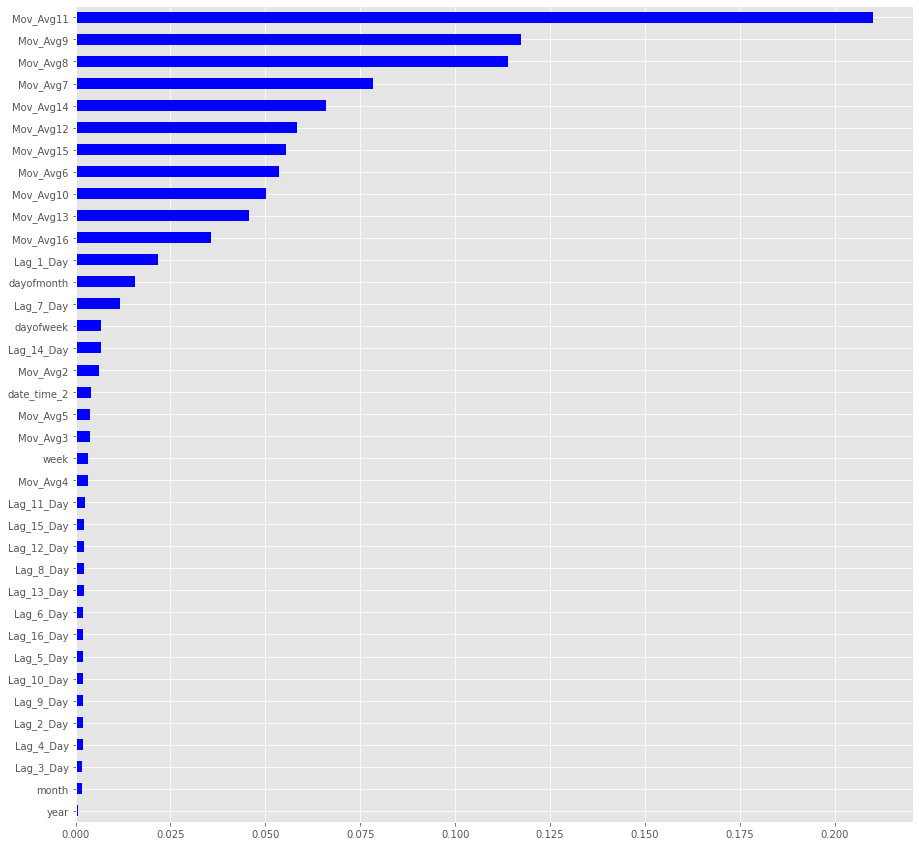

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Create a pd.Series of features importances
importances_rf = pd.Series(rf_reg.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.rcParams["figure.figsize"] = [15,15]
plt.show()

In [22]:
sorted_importances_rf

year           0.000527
month          0.001696
Lag_3_Day      0.001740
Lag_4_Day      0.001826
Lag_2_Day      0.001839
Lag_9_Day      0.001855
Lag_10_Day     0.001876
Lag_5_Day      0.001972
Lag_16_Day     0.002058
Lag_6_Day      0.002064
Lag_13_Day     0.002104
Lag_8_Day      0.002222
Lag_12_Day     0.002270
Lag_15_Day     0.002342
Lag_11_Day     0.002477
Mov_Avg4       0.003185
week           0.003374
Mov_Avg3       0.003762
Mov_Avg5       0.003884
date_time_2    0.003951
Mov_Avg2       0.006062
Lag_14_Day     0.006572
dayofweek      0.006665
Lag_7_Day      0.011788
dayofmonth     0.015615
Lag_1_Day      0.021676
Mov_Avg16      0.035693
Mov_Avg13      0.045580
Mov_Avg10      0.050171
Mov_Avg6       0.053694
Mov_Avg15      0.055473
Mov_Avg12      0.058306
Mov_Avg14      0.065941
Mov_Avg7       0.078401
Mov_Avg8       0.114064
Mov_Avg9       0.117241
Mov_Avg11      0.210032
dtype: float64

## Forecast Future Values

#### Define Function to create new row and append to Data Frame

In [23]:
# Create New Row for Future Time Step's Predictors
def forecast_new_row(df):

    new_row=[]
    #Add next time_step's lagged variables
    Lag_1_Day=df.iloc[-1]['Ct']
    new_row.append(Lag_1_Day)
    Lag_2_Day=df.iloc[-1]['Lag_1_Day']
    new_row.append(Lag_2_Day)
    Lag_3_Day=df.iloc[-1]['Lag_2_Day']
    new_row.append(Lag_3_Day)
    Lag_4_Day=df.iloc[-1]['Lag_3_Day']
    new_row.append(Lag_4_Day)
    Lag_5_Day=df.iloc[-1]['Lag_4_Day']
    new_row.append(Lag_5_Day)
    Lag_6_Day=df.iloc[-1]['Lag_5_Day']
    new_row.append(Lag_6_Day)
    Lag_7_Day=df.iloc[-1]['Lag_6_Day']
    new_row.append(Lag_7_Day)
    Lag_8_Day=df.iloc[-1]['Lag_7_Day']
    new_row.append(Lag_8_Day)
    Lag_9_Day=df.iloc[-1]['Lag_8_Day']
    new_row.append(Lag_9_Day)
    Lag_10_Day=df.iloc[-1]['Lag_9_Day']
    new_row.append(Lag_10_Day)
    Lag_11_Day=df.iloc[-1]['Lag_10_Day']
    new_row.append(Lag_11_Day)
    Lag_12_Day=df.iloc[-1]['Lag_11_Day']
    new_row.append(Lag_12_Day)
    Lag_13_Day=df.iloc[-1]['Lag_12_Day']
    new_row.append(Lag_13_Day)
    Lag_14_Day=df.iloc[-1]['Lag_13_Day']
    new_row.append(Lag_14_Day)
    
    Lag_15_Day=df.iloc[-1]['Lag_14_Day']
    new_row.append(Lag_15_Day)
    Lag_16_Day=df.iloc[-1]['Lag_15_Day']
    new_row.append(Lag_16_Day)

    
    
    #Add next time_step's Moving Average variables
    Mov_Avg1=df_dly_crm['Ct'].shift(1).rolling(window=1).mean().iloc[-1]
    new_row.append(Mov_Avg1)
    Mov_Avg2=df_dly_crm['Ct'].shift(1).rolling(window=2).mean().iloc[-1]
    new_row.append(Mov_Avg2)
    Mov_Avg3=df_dly_crm['Ct'].shift(1).rolling(window=3).mean().iloc[-1]
    new_row.append(Mov_Avg3)
    Mov_Avg4=df_dly_crm['Ct'].shift(1).rolling(window=4).mean().iloc[-1]
    new_row.append(Mov_Avg4)
    Mov_Avg5=df_dly_crm['Ct'].shift(1).rolling(window=5).mean().iloc[-1]
    new_row.append(Mov_Avg5)
    Mov_Avg6=df_dly_crm['Ct'].shift(1).rolling(window=6).mean().iloc[-1]
    new_row.append(Mov_Avg6)
    Mov_Avg7=df_dly_crm['Ct'].shift(1).rolling(window=7).mean().iloc[-1]
    new_row.append(Mov_Avg7)
    Mov_Avg8=df_dly_crm['Ct'].shift(1).rolling(window=8).mean().iloc[-1]
    new_row.append(Mov_Avg8)
    Mov_Avg9=df_dly_crm['Ct'].shift(1).rolling(window=9).mean().iloc[-1]
    new_row.append(Mov_Avg9)
    

    Mov_Avg10=df_dly_crm['Ct'].shift(1).rolling(window=10).mean().iloc[-1]
    new_row.append(Mov_Avg10)
    Mov_Avg11=df_dly_crm['Ct'].shift(1).rolling(window=11).mean().iloc[-1]
    new_row.append(Mov_Avg11)
    Mov_Avg12=df_dly_crm['Ct'].shift(1).rolling(window=12).mean().iloc[-1]
    new_row.append(Mov_Avg12)
    Mov_Avg13=df_dly_crm['Ct'].shift(1).rolling(window=13).mean().iloc[-1]
    new_row.append(Mov_Avg13)
    Mov_Avg14=df_dly_crm['Ct'].shift(1).rolling(window=14).mean().iloc[-1]
    new_row.append(Mov_Avg14)
    Mov_Avg15=df_dly_crm['Ct'].shift(1).rolling(window=15).mean().iloc[-1]
    new_row.append(Mov_Avg15)
    Mov_Avg16=df_dly_crm['Ct'].shift(1).rolling(window=16).mean().iloc[-1]
    new_row.append(Mov_Avg16)

    

    #Add next time_step's Date Features
    date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")

    date_time_2=date_time.astype('datetime64[ns]').astype(np.int64)/10**9
    year=date_time.dt.year
    month=date_time.dt.month
    week=date_time.dt.week
    dayofmonth=date_time.dt.day
    dayofweek=date_time.dt.dayofweek

    #convert Date Series Objects to Regular? Date Objects
    date_time=date_time.iloc[0]
    new_row.append(date_time)
    date_time_2=date_time_2.iloc[0]
    new_row.append(date_time_2)
    year=year.iloc[0]
    new_row.append(year)
    month=month.iloc[0]
    new_row.append(month)
    week=week.iloc[0]
    new_row.append(week)
    dayofmonth=dayofmonth.iloc[0]
    new_row.append(dayofmonth)
    dayofweek=dayofweek.iloc[0]
    new_row.append(dayofweek)

    #Predict future Y Value using Next Time Step's New Row


    df_new_row=pd.DataFrame(new_row).T
    df_new_row.columns=[['Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day', 'Lag_5_Day','Lag_6_Day', 
                         'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day', 'Lag_10_Day',
                         'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day', 'Lag_15_Day', 'Lag_16_Day',
                         
                         'Mov_Avg1', 'Mov_Avg2', 'Mov_Avg3', 'Mov_Avg4',
       'Mov_Avg5', 'Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9', 'Mov_Avg10',
       'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14', 'Mov_Avg15',
       'Mov_Avg16',
                         'date_time','date_time_2', 'year', 'month', 'week', 'dayofmonth', 'dayofweek']]

    #extra step allows one to hand select features
#     X_last=df_new_row[['Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day','Lag_5_Day', 
#                        'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day','Lag_10_Day', 
#                        'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day','Lag_14_Day','year', 'month', 'week', 
#                        'dayofmonth', 'dayofweek', 'date_time_2']]
    
    X_last=df_new_row[['Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day', 'Lag_5_Day',
       'Lag_6_Day', 'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day', 'Lag_10_Day',
       'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day', 'Lag_15_Day', 'Lag_16_Day', 
    'Mov_Avg2', 'Mov_Avg3', 'Mov_Avg4', 'Mov_Avg5','Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9', 'Mov_Avg10',
       'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14', 'Mov_Avg15','Mov_Avg16','date_time_2', 
        'year', 'month', 'week','dayofmonth', 'dayofweek']]

    Y_new=rf_reg.predict(X_last)


    #Add new row with predicted Y to originaly data frame


    #add new row with predicted count to originaly data frame - df
    fin_list=[]
    fin_list.append(Y_new[0])
    fin_list_2=fin_list+new_row

    df_new_row_fin=pd.DataFrame(fin_list_2).T.reset_index()
    df_new_row_fin.pop('index')
    df_new_row_fin.columns=['Ct','Lag_1_Day', 'Lag_2_Day', 'Lag_3_Day', 'Lag_4_Day', 'Lag_5_Day','Lag_6_Day', 
                         'Lag_7_Day', 'Lag_8_Day', 'Lag_9_Day', 'Lag_10_Day',
                         'Lag_11_Day', 'Lag_12_Day', 'Lag_13_Day', 'Lag_14_Day', 'Lag_15_Day', 'Lag_16_Day',
                         'Mov_Avg1', 'Mov_Avg2', 'Mov_Avg3', 'Mov_Avg4',
       'Mov_Avg5', 'Mov_Avg6', 'Mov_Avg7', 'Mov_Avg8', 'Mov_Avg9', 'Mov_Avg10',
       'Mov_Avg11', 'Mov_Avg12', 'Mov_Avg13', 'Mov_Avg14', 'Mov_Avg15',
       'Mov_Avg16',
                         'date_time','date_time_2', 'year', 'month', 'week', 'dayofmonth', 'dayofweek'] 
    return(df_new_row_fin)

In [ ]:
n_row=forecast_new_row(df_dly_crm)
df_forecast=pd.concat([df_dly_crm,n_row])
#df_forecast

In [24]:
n_row=forecast_new_row(df_dly_crm)
n_row

<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")
<ipython-input-23-e4eeb6d32dfa>:86: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week=date_time.dt.week


,Ct,Lag_1_Day,Lag_2_Day,Lag_3_Day,Lag_4_Day,Lag_5_Day,Lag_6_Day,Lag_7_Day,Lag_8_Day,Lag_9_Day,...,Mov_Avg14,Mov_Avg15,Mov_Avg16,date_time,date_time_2,year,month,week,dayofmonth,dayofweek
0,496.38,497,466.0,378.0,526.0,453.0,490.0,543.0,556.0,531.0,...,510.571429,511.0,513.0625,2021-11-28 23:59:00,1638143940.0,2021,11,47,28,6


## Random Forest - Nov 2021 Forecasting

In [25]:
df_train = df_dly_crm[df_dly_crm['date_time']<'2021-11-01']
df_test = df_dly_crm[df_dly_crm['date_time']>='2021-11-01']
#using train dataset, forecast 27 days of Nov 1st to Nov 27th

In [26]:
for idx in range(1, 28):
    n_row=forecast_new_row(df_train)
    df_train=pd.concat([df_train,n_row])

<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")
<ipython-input-23-e4eeb6d32dfa>:86: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week=date_time.dt.week
<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")
<ipython-input-23-e4eeb6d32dfa>:86: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week=date_time.dt.week
<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future 

<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")
<ipython-input-23-e4eeb6d32dfa>:86: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week=date_time.dt.week
<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  date_time=df.iloc[-1:]['date_time']+pd.to_timedelta(pd.np.ceil(1),unit="D")
<ipython-input-23-e4eeb6d32dfa>:86: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week=date_time.dt.week
<ipython-input-23-e4eeb6d32dfa>:81: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future 

In [27]:
y_pred=df_train[df_train['date_time']>='2021-11-01']['Ct']
y_test=df_test['Ct']

#### Join Test and Pred together as 1 Pandas Data Frame

In [28]:
df_y_pred=pd.DataFrame(y_pred)
df_y_test=pd.DataFrame(y_test)

df_y_pred=df_y_pred.reset_index()
df_y_pred.pop('index')
df_y_test=df_y_test.reset_index()
df_y_test.pop('index')

df_y_test.columns=['ct_test']
df_y_pred.columns=['ct_pred']
cmp=df_y_test.join(df_y_pred, how='inner')

cmp['ct_pred']=cmp['ct_pred'].astype(float)

#### Find Random Forests - Root Mean Squared Error for November

In [29]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_pred, y_test, squared=False)
rms

72.5180014229545

#### Random Forest Predicted - Chicago Crime - November 2021

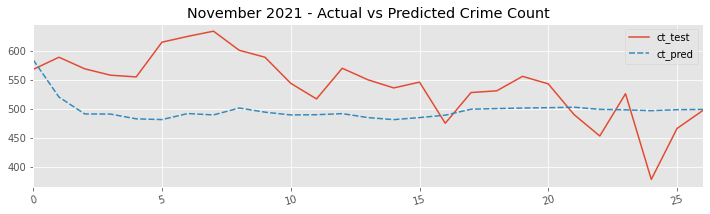

In [30]:
fig = plt.figure(figsize=(12,3))
sns.lineplot(data=cmp).margins(x=0)
plt.xticks(rotation=15)
plt.title('November 2021 - Actual vs Predicted Crime Count')
plt.show()

# LSTMs - Nov 2021

In [ ]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import keras
import tensorflow

import tensorflow.keras
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy as np

from keras.layers.convolutional import Conv1D, MaxPooling1D


import keras.utils
from keras import utils as np_utils

from keras.utils import np_utils


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Convolution1D, Flatten, LeakyReLU
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import SpatialDropout1D, MaxPooling1D, Bidirectional, GRU, concatenate


# import necessary tools and models 
import seaborn as sns
import matplotlib.pyplot as plt 

import sklearn.model_selection as cv
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from keras.regularizers import l2, l1_l2

### Multiple Input Multi-Step Output

In [ ]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 

### Re Load Daily Crime

In [ ]:
df_daily_crime = pd.read_csv('chicago_daily_crime.csv')
#df_dly_crm = pd.read_csv('../input/chicago-daily-crime/chicago_daily_crime.csv')
df_daily_crime.columns = ['Ct', 'Date']

In [ ]:
df_daily_crime['date_time'] = pd.to_datetime(df_daily_crime['Date'])

In [ ]:
# #QA Check
# df_daily_crime['Year'] = df_daily_crime['date_time'].apply(lambda x: "%d" % (x.year))
# df_daily_crime.groupby(['Year']).size()

#### Truncate Daily Crime so its between Jan 2001 and Oct 2021

In [ ]:
df_daily_crime_2=df_daily_crime[(df_daily_crime['date_time']>='2001-01-01') & (df_daily_crime['date_time']<'2021-11-01')]
df_daily_crime_2.head(3)

### Load Daily Temperature for Chicago

In [ ]:
df_weather=pd.read_csv('chicago_weather_2813591.csv')
df_weather['date_time'] = pd.to_datetime(df_weather['DATE'])
#Missing a Significant amoutn of average temperatures
df_weather['alt_avg_temp']=(df_weather['TMAX']+df_weather['TMIN'])/2
df_weather.TAVG.fillna(df_weather.alt_avg_temp, inplace=True)
df_weather_2=df_weather[['date_time','TAVG']]
#Remove temperatures for 2000

In [ ]:
# #QA Check
# df_weather_2['Year'] = df_weather_2['date_time'].apply(lambda x: "%d" % (x.year))
# df_weather_2.groupby(['Year']).size()

#### Truncate Weather so its between Jan 2001 and Oct 2021

In [ ]:
df_weather_3=df_weather_2[(df_weather_2['date_time']>='2001-01-01') & (df_weather_2['date_time']<'2021-11-01')]
df_weather_3.head(3)

##### Convert Daily Average Weather to Numpy Array

In [ ]:
weather_seq=df_weather_3['TAVG'].to_numpy()
weather_seq

##### Convert Daily Crime to Numpy Array

In [ ]:
crime_seq=df_daily_crime_2['Ct'].to_numpy()
crime_seq

In [ ]:
out_seq = array([crime_seq[i]for i in range(len(crime_seq))])
out_seq

In [ ]:
weather_seq

##### Scale Inputs and Outputs to prevent Exploding Gradients

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

#QuantileTransformer(output_distribution="uniform").fit_transform(X)

# trans_wet = PowerTransformer(method='yeo-johnson')
# weather_seq_2 = trans_wet.fit_transform(weather_seq)

# trans_crime = PowerTransformer(method='yeo-johnson')
# crime_seq_2 = trans_crime.fit_transform(crime_seq)

# trans_out = PowerTransformer(method='yeo-johnson')
# out_seq_2 = trans_out.fit_transform(out_seq)

trans_wet = QuantileTransformer(output_distribution="uniform")
weather_seq_2 = trans_wet.fit_transform(weather_seq.reshape(-1, 1))

trans_crime = QuantileTransformer(output_distribution="uniform")
crime_seq_2 = trans_crime.fit_transform(crime_seq.reshape(-1, 1))

trans_out = QuantileTransformer(output_distribution="uniform")
out_seq_2 = trans_out.fit_transform(out_seq.reshape(-1, 1))

In [ ]:
out_seq_2

#### Create Tensors of 50 time steps back, 7 time steps forward

In [ ]:
# convert to [rows, columns] structure
weather_seq_2 = weather_seq_2.reshape((len(weather_seq_2), 1))
crime_seq_2 = crime_seq_2.reshape((len(crime_seq_2), 1))
out_seq_2 = out_seq_2.reshape((len(out_seq_2), 1))

In [ ]:
# horizontally stack columns
dataset = hstack((weather_seq_2, crime_seq_2, out_seq_2))
# choose a number of time steps
n_steps_in, n_steps_out = 50, 7
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
# for i in range(len(X)):
#     print(X[i], y[i])

In [ ]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
n_features

In [ ]:
n_steps_out

In [ ]:
# # define model
# #kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001),
# model = Sequential()
# model.add(LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001),input_shape=(n_steps_in, n_features)))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(n_steps_out, return_sequences=True,kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001), activation='relu'))
# model.add(Flatten())
# model.add(Dropout(0.2))

# model.add(BatchNormalization())
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(.4))
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(.4))
# model.add(Dense(n_steps_out))

In [ ]:
# define model
#kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001),
model = Sequential()
model.add(Bidirectional(LSTM(36, activation='relu', return_sequences=True, 
               kernel_regularizer=l2(0.0002), recurrent_regularizer=l2(0.0002),
               input_shape=(n_steps_in, n_features))))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
model.add(Flatten())
#model.add(LSTM(64, kernel_regularizer=l2(0.0002), recurrent_regularizer=l2(0.0002), activation='relu'))

model.add(Dense(128, activation="relu"))
model.add(Dropout(.4))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.3))
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(.4))
model.add(Dense(n_steps_out))

In [ ]:
optimizerr = keras.optimizers.RMSprop()

In [ ]:
model.compile(optimizer=optimizerr, loss='mse')

In [ ]:
model.summary()

In [ ]:
my_callbacks_2 = [
    EarlyStopping(monitor='val_loss', min_delta=0, patience=10),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.3f}.h5'),
    TensorBoard(log_dir='logs'),
]

#validation_split=0.2, callbacks=my_callbacks_2,

In [ ]:
history = model.fit(X, y, 
                       epochs=100, batch_size=32,
                       validation_split=0.2, callbacks=my_callbacks_2,
                      )

In [ ]:
plt.figure(221)

plt.figure(0)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 51, 2.0))
plt.rcParams['figure.figsize'] = (12, 4)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE Loss")
plt.title("Training MSE vs Validation MSE")
plt.legend(['train','validation'])

#### Load Best Model Back In

In [ ]:
model = keras.models.load_model('model.08-0.013.h5')
#model = keras.models.load_model('model.09-0.01.h5')

#### Want Last X as input

In [ ]:
array_length = len(X)
last_element = X[array_length - 1]

In [ ]:
last_element.shape

In [ ]:
last_element = last_element.reshape((1, 50, 2))

In [ ]:
yhat = model.predict(last_element, verbose=1)

In [ ]:
yhat.shape

In [ ]:
yhat

In [ ]:
yhat_2=yhat.flatten()
yhat_3=yhat_2.reshape(-1, 1)
y_pred=trans_out.inverse_transform(yhat_3)
y_pred=pd.Series(y_pred.flatten())
nov_pred=y_pred

In [ ]:
y_pred

In [ ]:
nov_test=df_daily_crime[(df_daily_crime['date_time']>='2021-11-01') & (df_daily_crime['date_time']<='2021-11-07')]
nov_test=nov_test.reset_index()
nov_test=nov_test['Ct']

In [ ]:
nov_test

#### Find LSTMs - Root Mean Squared Error for November

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(nov_pred, nov_test, squared=False)
rms

#### Join Test and Pred together as 1 Pandas Data Frame

In [ ]:
df_y_pred=pd.DataFrame(nov_pred)
df_y_test=pd.DataFrame(nov_test)

df_y_pred=df_y_pred.reset_index()
df_y_pred.pop('index')
df_y_test=df_y_test.reset_index()
df_y_test.pop('index')

df_y_test.columns=['ct_test']
df_y_pred.columns=['ct_pred']
cmp=df_y_test.join(df_y_pred, how='inner')

cmp['ct_pred']=cmp['ct_pred'].astype(float)

#### LSTM Predicted - Chicago Crime - November 2021

In [ ]:
fig = plt.figure(figsize=(12,3))
sns.lineplot(data=cmp).margins(x=0)
plt.xticks(rotation=15)
plt.title('November 2021 - Actual vs Predicted Crime Count')
plt.show()